In [5]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)

formatter = FuncFormatter(thousands)

In [6]:
data_0_0 = pd.read_csv('/home/user/Desktop/jeongwon/딥러닝 팀플/fluctuation_ablation/selection_history_dataset_cifar10_noisemode_instance_seed_1_R_0_Lcr_0.csv')

In [7]:
data_0_0

,epoch,num_total_selection,num_clean
0,10,42262,25166
1,11,44625,25503
2,12,44936,27266
3,13,45818,27652
4,14,44782,26091
...,...,...,...
61,71,46786,28959
62,72,47083,29037
63,73,47597,29067
64,74,46951,28496


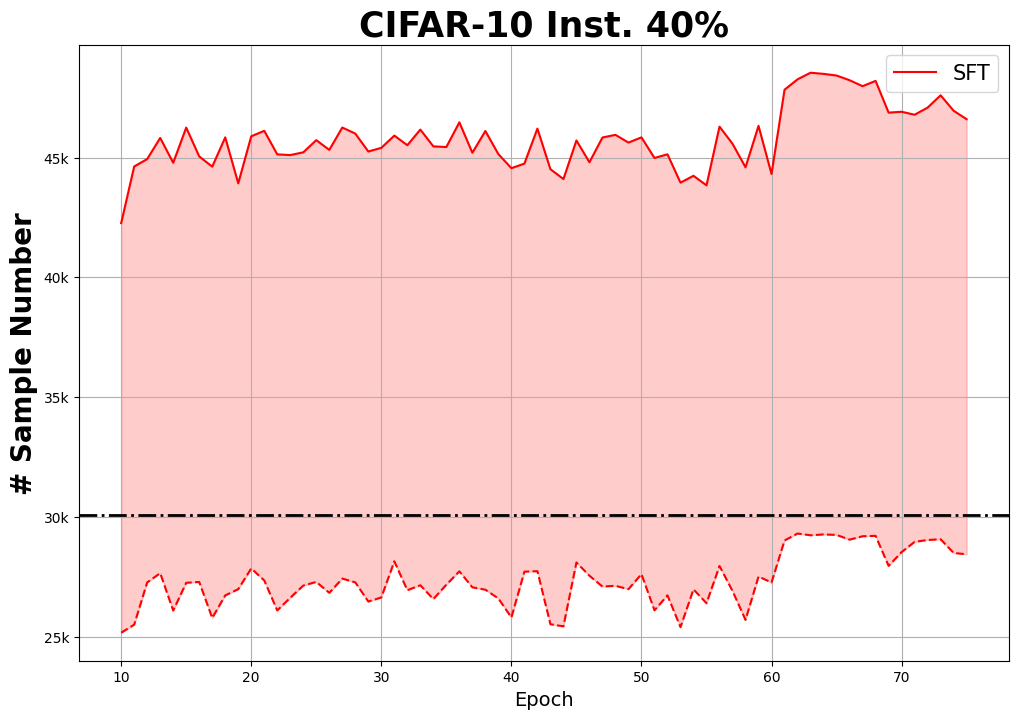

In [8]:
plt.figure(figsize=(12, 8))


# 각 데이터셋에 대한 그래프를 그림
plt.axhline(30098, color='black', linestyle='-.', linewidth=2)
plt.plot(data_0_0['epoch'], data_0_0['num_total_selection'], label='SFT', linestyle='-', color='red')
plt.plot(data_0_0['epoch'], data_0_0['num_clean'], linestyle='--', color='red')
plt.fill_between(data_0_0['epoch'], data_0_0['num_total_selection'], data_0_0['num_clean'], color='red', alpha=0.2)

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('# Sample Number', fontsize=20, fontweight='bold')  # 강조
plt.gca().yaxis.set_major_formatter(formatter)  # y축 레이블 형식 변경
plt.title('CIFAR-10 Inst. 40%', fontsize=25, fontweight='bold')
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [9]:
def plot_figure_10_ablation(noise_mode,seed):
    data_0_0_f = pd.read_csv(f'/home/user/Desktop/jeongwon/딥러닝 팀플/fluctuation_ablation/selection_history_dataset_cifar10_noisemode_{noise_mode}_seed_{seed}_R_0_Lcr_0.csv')
    data_0_0 = pd.read_csv(f'/home/user/Desktop/jeongwon/딥러닝 팀플/figure_10/selection_history_dataset_cifar10_noisemode_{noise_mode}_seed_{seed}_R_1_Lcr_0.csv')


    plt.figure(figsize=(8, 6))


    # 각 데이터셋에 대한 그래프를 그림
    if noise_mode == 'instance':
        plt.axhline(30098, color='black', linestyle='-.', linewidth=2)
    elif noise_mode == 'pair':
        plt.axhline(30024, color='black', linestyle='-.', linewidth=2)
    elif noise_mode == 'sym':
        plt.axhline(30231, color='black', linestyle='-.', linewidth=2)

    plt.plot(data_0_0['epoch'], data_0_0['num_total_selection'], label='SFT', linestyle='-', color='red')
    plt.plot(data_0_0['epoch'], data_0_0['num_clean'], linestyle='--', color='red')
    plt.fill_between(data_0_0['epoch'], data_0_0['num_total_selection'], data_0_0['num_clean'], color='red', alpha=0.2)

    plt.plot(data_0_0_f['epoch'], data_0_0_f['num_total_selection'], label='Fluctuation study', linestyle='-', color='green')
    plt.plot(data_0_0_f['epoch'], data_0_0_f['num_clean'], linestyle='--', color='green')
    plt.fill_between(data_0_0_f['epoch'], data_0_0_f['num_total_selection'], data_0_0_f['num_clean'], color='green', alpha=0.2)

    plt.xlabel('Epoch', fontsize=20, fontweight='bold')
    plt.ylabel('# Sample Number', fontsize=20, fontweight='bold')  # 강조
    plt.gca().yaxis.set_major_formatter(formatter)  # y축 레이블 형식 변경
    if noise_mode =='instance':
        plt.title('CIFAR-10 Inst. 40%', fontsize=25, fontweight='bold')
    elif noise_mode =='pair':
        plt.title('CIFAR-10 Pair. 40%', fontsize=25, fontweight='bold')
    elif noise_mode =='sym':
        plt.title('CIFAR-10 Sym. 40%', fontsize=25, fontweight='bold')


    plt.legend(prop={'size':17,'weight':'bold'})
    plt.grid(True)
    plt.show()

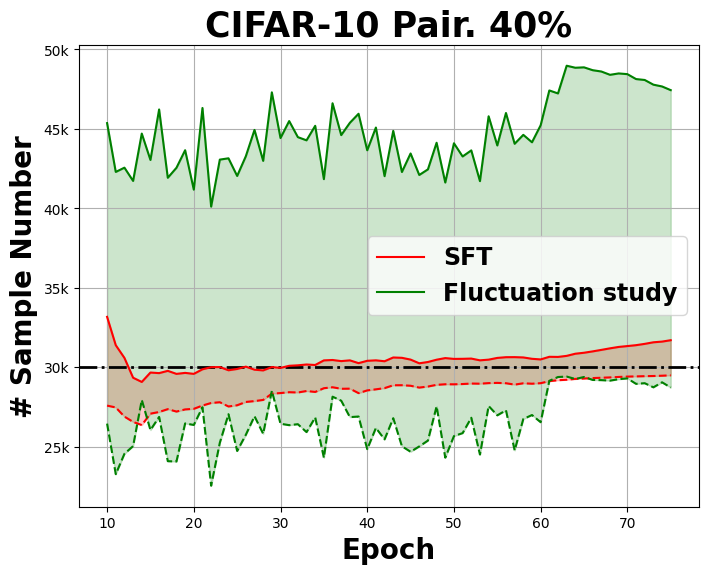

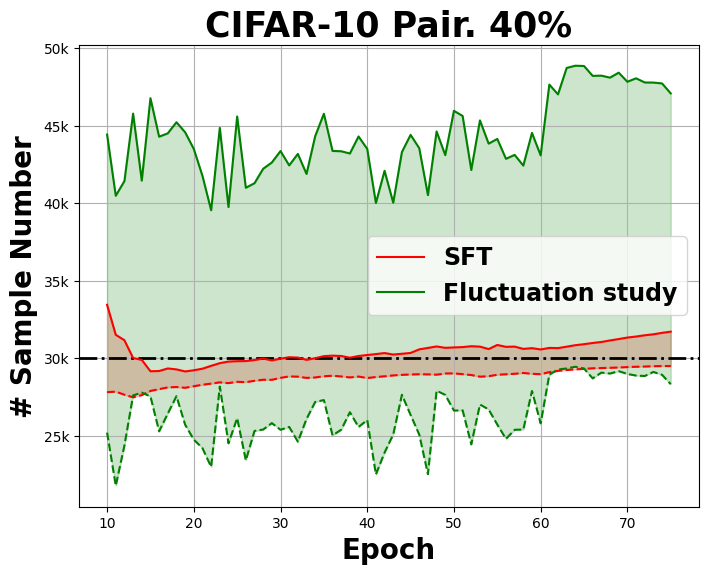

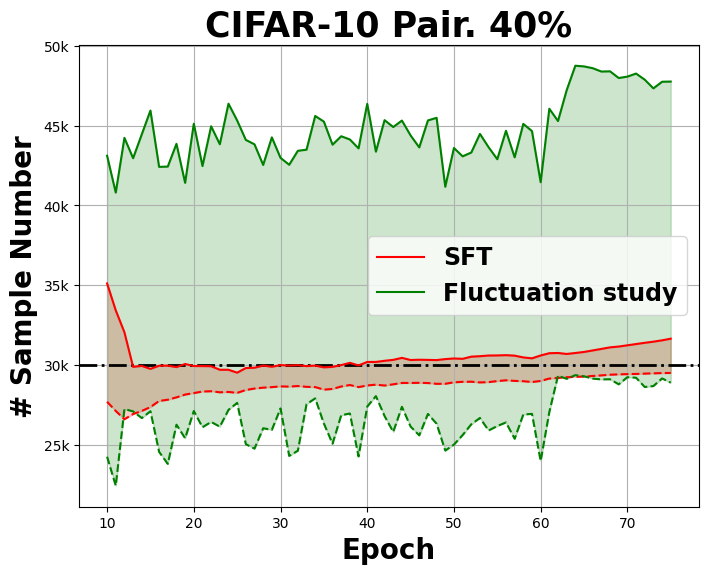

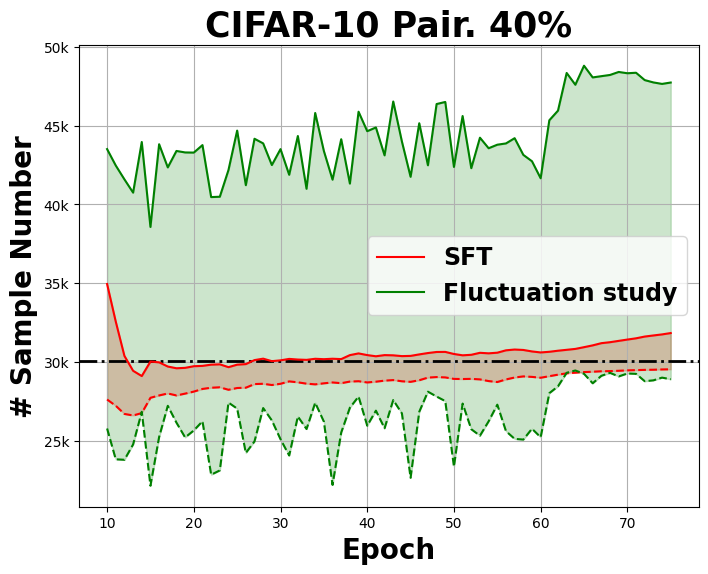

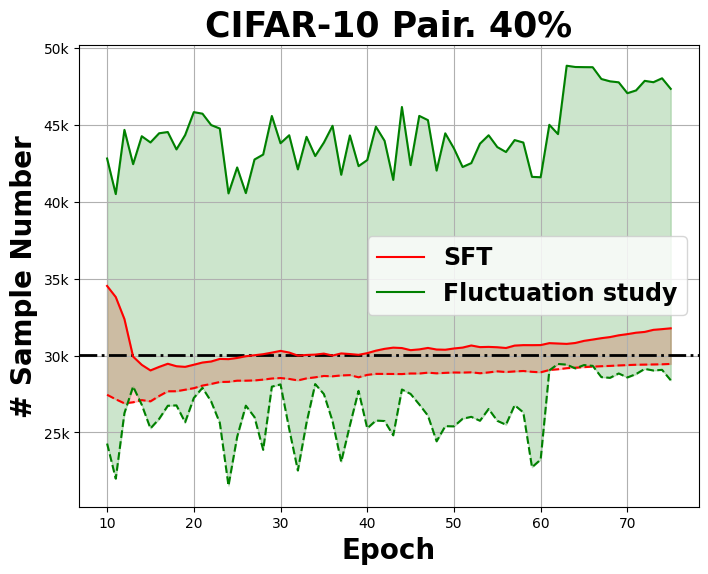

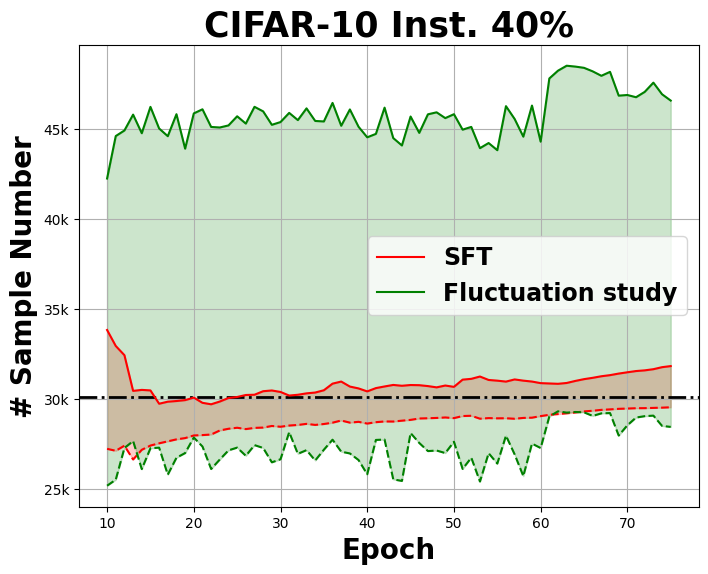

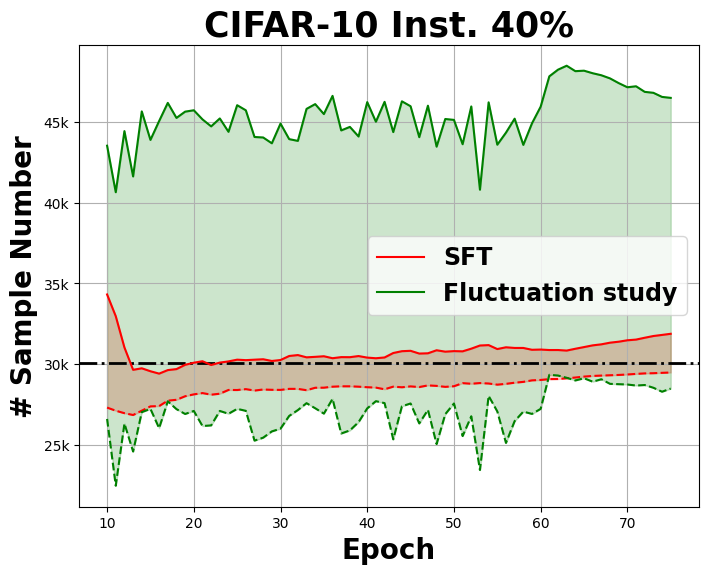

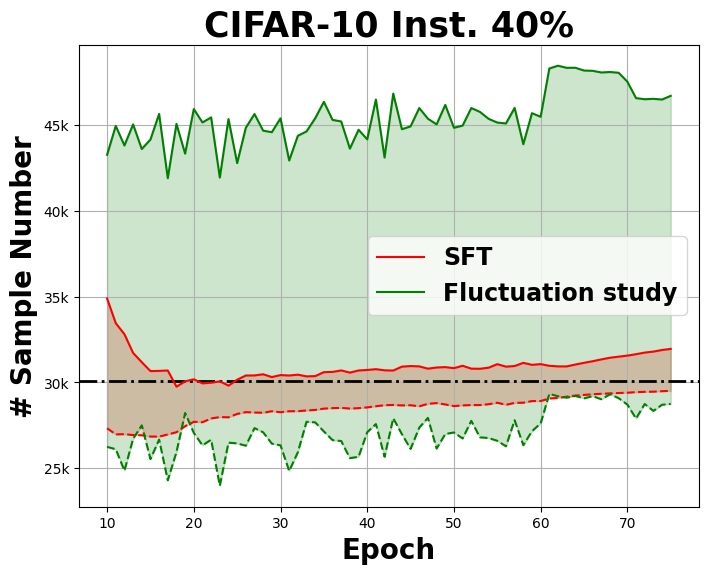

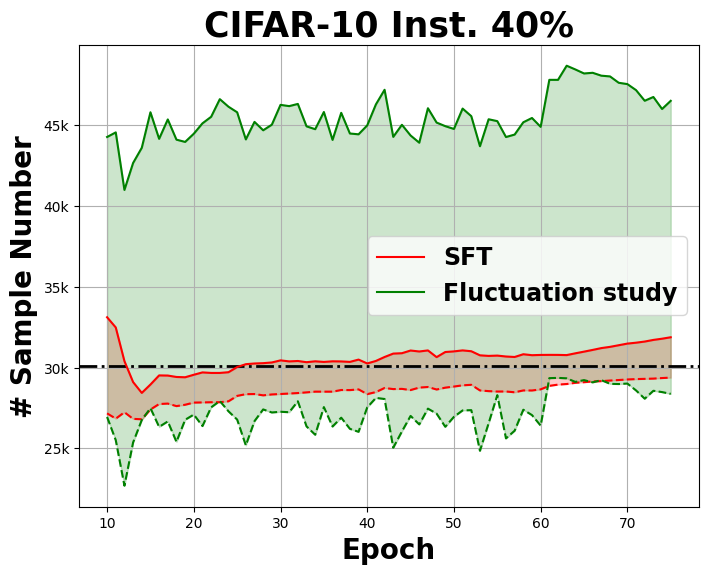

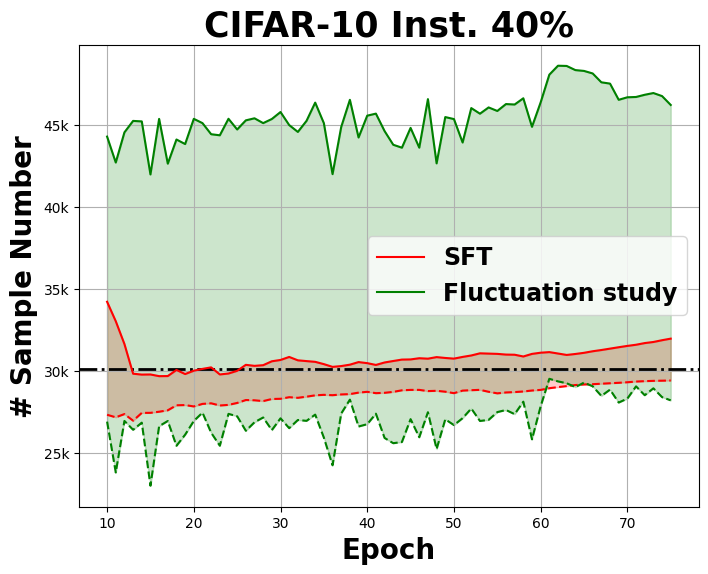

In [10]:
modes = ['pair','instance']
seeds = [1,2,3,4,5]
for mode in modes:
    for seed in seeds:
        plot_figure_10_ablation(mode,seed)

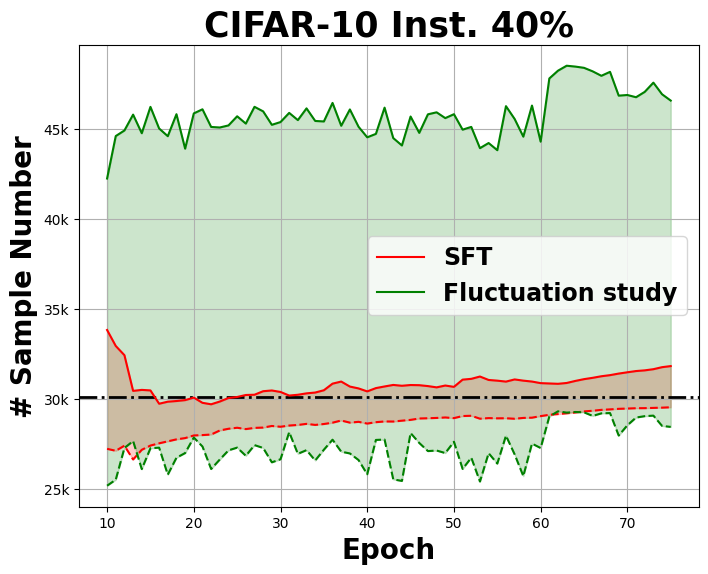

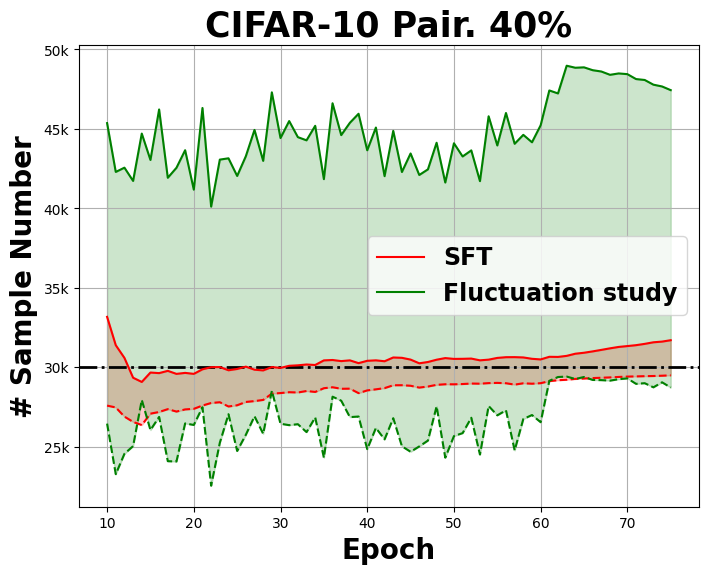

In [11]:
plot_figure_10_ablation('instance',1)
plot_figure_10_ablation('pair',1)

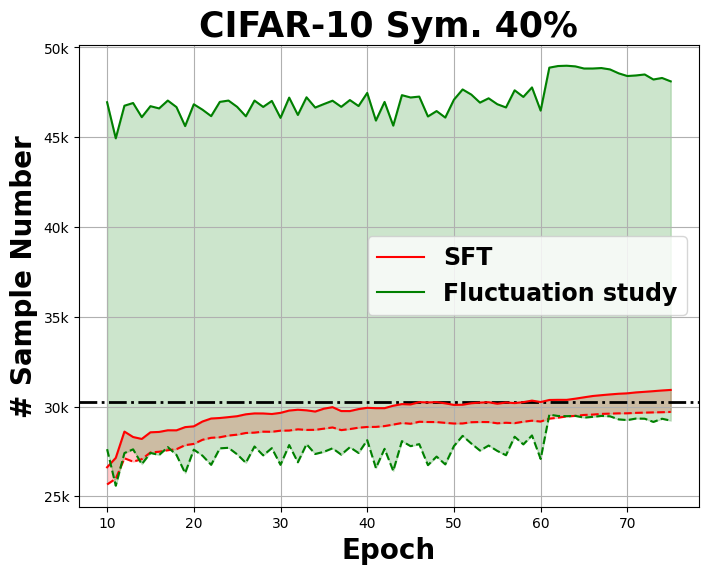

In [12]:
modes = ['sym']
seeds = [1]
for mode in modes:
    for seed in seeds:
        plot_figure_10_ablation(mode,seed)